In [29]:
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [30]:
batch_size = 16
epochs = 15
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2470, 0.2435, 0.2616])])
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                         shuffle=False, num_workers=0)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Files already downloaded and verified
Files already downloaded and verified


In [33]:

class network_g_19(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding = 1)
        self.conv7 = nn.Conv2d(256, 512, 3, padding = 1)
        self.conv8 = nn.Conv2d(512, 512, 3, padding = 1)
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        self.bn4 = nn.BatchNorm2d(512)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.6)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.bn1(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = self.bn2(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.pool(x)
        x = self.bn3(x)
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = self.pool(x)
        x = self.bn4(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

net = network_g_19()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.to(device)
criterion.to(device)


network_g_19(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [34]:
training_loss_history = []
testing_accuracy_history = []
for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:# get mean loss every 2000 mini batches
            training_loss_history.append(running_loss / 2000)
            running_loss = 0.0
    correct = 0
    total = 0
    total_test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images.cuda())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.cuda().size(0)
            correct += (predicted == labels.cuda()).sum().item()
    accuracy = 100 * correct / total
    testing_accuracy_history.append(accuracy)
print('Finished Training')

0
start
torch.Size([16, 32, 32, 32])
torch.Size([16, 64, 32, 32])
torch.Size([16, 64, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 4, 4])
torch.Size([16, 512, 4, 4])
torch.Size([16, 512, 4, 4])
torch.Size([16, 512, 2, 2])
end
1
start
torch.Size([16, 32, 32, 32])
torch.Size([16, 64, 32, 32])
torch.Size([16, 64, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 4, 4])
torch.Size([16, 512, 4, 4])
torch.Size([16, 512, 4, 4])
torch.Size([16, 512, 2, 2])
end
2
start
torch.Size([16, 32, 32, 32])
torch.Size([16, 64, 32, 32])
torch.Size([16, 64, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 16, 16])
torch.Size([16, 128, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 8, 8])
torch.Size([16, 256, 4, 4])
torch.Size([16, 512, 4,

KeyboardInterrupt: 

## Final run through the testing dataset to get the overall accuracy reading

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.cuda().size(0)
        correct += (predicted == labels.cuda()).sum().item()

print(f'Test accuracy: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 83.04 %


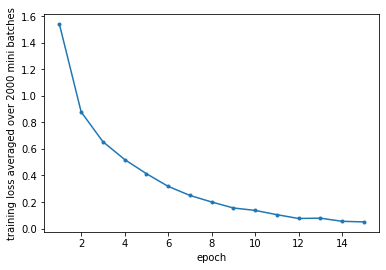

In [ ]:
import seaborn as sns

plt.plot(range (1, epochs + 1), training_loss_history, marker = '.')
plt.xlabel("epoch")
plt.ylabel("training loss averaged over 2000 mini batches")
plt.savefig("training_loss.jpg")

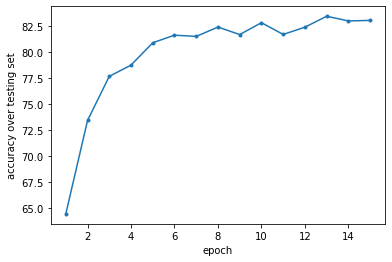

In [ ]:
plt.plot(range(1, epochs + 1), testing_accuracy_history, marker = '.')
plt.xlabel("epoch")
plt.ylabel("accuracy over testing set")
plt.savefig("testing_accuracy.jpg")

In [ ]:
correct_per_class = {classname: 0 for classname in classes}
total_per_class = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.cuda())
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label.cuda() == prediction:
                correct_per_class[classes[label.cuda()]] += 1
            total_per_class[classes[label.cuda()]] += 1


for classname, correct_count in correct_per_class.items():
    accuracy = 100 * float(correct_count) / total_per_class[classname]
    print(f'Accuracy for class: {classname} is {accuracy} %')




Accuracy for class: plane is 83.3 %
Accuracy for class: car is 92.0 %
Accuracy for class: bird is 75.9 %
Accuracy for class: cat is 71.9 %
Accuracy for class: deer is 76.2 %
Accuracy for class: dog is 77.6 %
Accuracy for class: frog is 85.7 %
Accuracy for class: horse is 86.3 %
Accuracy for class: ship is 85.6 %
Accuracy for class: truck is 91.6 %


In [ ]:
accuracy_by_class = {}
for classname in correct_per_class.keys():
    accuracy_by_class[classname] = correct_per_class[classname] / total_per_class[classname]
plt.bar(accuracy_by_class.keys(), accuracy_by_class.values())
plt.xlabel("Dataset class")
plt.ylabel("prediction accuracy")
plt.savefig("acc_by_class.jpg", transparent = False)

NameError: name 'correct_per_class' is not defined